# Traffic signs detection project #
Section 3: CNN.

In [7]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

path_base = os.getcwd() + "\\databases"
train, test = np.load(os.path.join(path_base,'train.npy')), np.load(os.path.join(path_base,'test.npy'))
# train = train.astype("float32") / 255
# train = np.expand_dims(train, -1)
# test = test.astype("float32") / 255
# test = np.expand_dims(test, -1)


In [8]:
path_pict = os.getcwd() + "\\pictures"

f = open(path_pict + "\\TsignRecgTrain4170Annotation.txt", "r")
str = f.read()

lines = str.split("\n")
arr = []
for line in lines:
    arr.append(int(line.split(";")[7]))
    
Train_classes = []
for i in range(58):
    for k in range(arr.count(i)):
        Train_classes.append(i)

#get classification from file
path_pict = os.getcwd() + "\\pictures"

f = open(path_pict + "\\TsignRecgTest1994Annotation.txt", "r")
str = f.read()

lines = str.split("\n")
arr = []
for line in lines:
    arr.append(int(line.split(";")[7]))
    
Test_classes = []
for i in range(58):
    for k in range(arr.count(i)):
        Test_classes.append(i)
Test_classes = np.array(Test_classes)
Train_classes = np.array(Train_classes)

large_train_classes = []
for i in range(0, 4170*3):
    large_train_classes.append(Train_classes[i % 4170])


In [9]:
# Now we augmentate the images in the array in order to get a larger data set and try to reach higher accuracy percentage:
from scipy import ndimage

large_train = []

for i in range(0, 4170):
    large_train.append(train[i])
for i in range(0, 4170):
    large_train.append(ndimage.rotate(train[i], 20, reshape=False))
for i in range(0, 4170):
    large_train.append(ndimage.rotate(train[i], -20, reshape=False))

large_train = np.array(large_train)

In [11]:
# Neural Network (CNN):
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 58
input_shape = (45, 45, 1)
y_train = keras.utils.to_categorical(large_train_classes, num_classes)
y_test = keras.utils.to_categorical(Test_classes, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(scale=1 / 127.5, offset=-1),
        layers.Conv2D(24, kernel_size=(6, 6), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(48, kernel_size=(5, 5), strides=(2, 2), activation="relu"),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(4, 4), strides=(2, 2), activation="relu"),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(num_classes, activation="relu"),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(large_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 45, 45, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 24)        888       
                                                                 
 batch_normalization_3 (Batc  (None, 40, 40, 24)       96        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 48)        28848     
                                                                 
 dropout_2 (Dropout)         (None, 18, 18, 48)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          49216     
                                                      

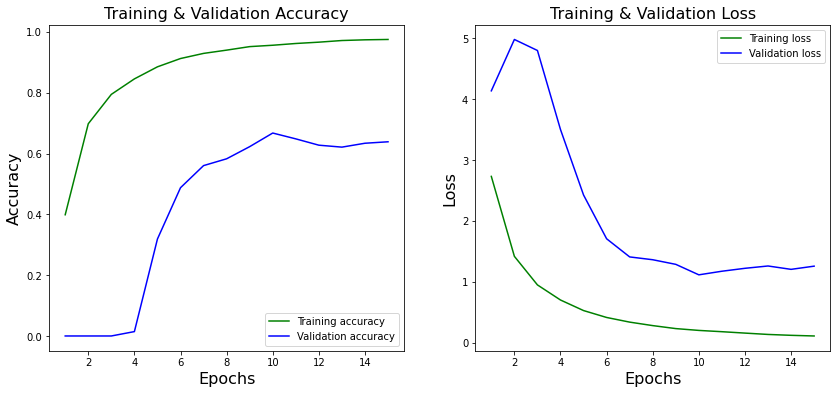

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'g', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'g', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

plt.show()